In [1]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
import glob

In [12]:
train_files=glob.glob("fingers/train/*")

In [13]:
len(train_files)

18000

In [14]:
train_files

['fingers/train/9e3cb712-4679-4e23-bc0f-fc0606e0ca58_5R.png',
 'fingers/train/93486912-fc61-40f3-bd74-fca8d77fb52f_4R.png',
 'fingers/train/4490a85e-2a7b-457e-a1ff-c2504980c17a_2L.png',
 'fingers/train/9e158656-ce8c-471d-9fb4-d342ff6e0d78_3L.png',
 'fingers/train/5f38e471-44be-442c-879d-f5d0d733821c_3R.png',
 'fingers/train/02545de6-d4d3-44c8-803e-8d663bb356de_0L.png',
 'fingers/train/464db0d3-2b05-4eaf-ac15-7188b6ca22e2_3R.png',
 'fingers/train/03622f4d-1062-463a-ae30-8af3ae23b4fb_5R.png',
 'fingers/train/476a7f8f-dcf1-47d8-b2d1-7ce19a036c91_2R.png',
 'fingers/train/c28be8f4-7987-4ee7-85a3-16025db01523_5L.png',
 'fingers/train/f51534a6-d287-4957-b1d1-34a11cc74182_0R.png',
 'fingers/train/c4524c72-c9b6-4f24-b0d7-939f2d6e75ab_4R.png',
 'fingers/train/df6ae2aa-a3f7-4290-98ac-a67e9e477f8c_1L.png',
 'fingers/train/e87f52a6-5780-4efb-b9c2-2e954c3ef83f_1R.png',
 'fingers/train/c5c512bc-0b2f-4ba2-871f-e81f26f3256b_0L.png',
 'fingers/train/0a09d23a-1fd5-491b-b17c-6d7aa0e151be_3L.png',
 'finger

In [15]:
from random import shuffle
shuffle(train_files)
train_files

['fingers/train/77a4279c-b88f-4eb5-9857-fc0a56e1a6b7_1R.png',
 'fingers/train/01086667-21b4-4724-96f6-8f771d1186ae_5L.png',
 'fingers/train/d651ea23-8e8a-4b20-8fb1-80f65dba852c_5R.png',
 'fingers/train/df59b93d-085d-4cd2-9f65-931e426e76bf_1L.png',
 'fingers/train/2e76ebf4-1ef9-4a9b-8cc6-e01d5575cf79_3L.png',
 'fingers/train/4b6bfc18-2648-45a2-867f-a97c39f79ba5_5R.png',
 'fingers/train/d200f5a6-4906-4f2f-b646-2f9026ff8c5a_4L.png',
 'fingers/train/9b6351c9-2067-4cc2-8247-5e0180192547_4L.png',
 'fingers/train/819e8690-04ca-4c1f-bb08-2c7b82c4d7fd_1L.png',
 'fingers/train/95b44ff8-cb65-4d6c-9f46-6bb6a8f3c9a5_5R.png',
 'fingers/train/73dece64-a506-46c9-8d1f-0835533cc1bc_3R.png',
 'fingers/train/91e2c323-26d3-4365-b31d-c977ac972fd4_1L.png',
 'fingers/train/33fc6905-bf8b-4417-aa45-b84cf28eb754_0L.png',
 'fingers/train/5ebca3a2-a5ee-4145-87b8-64ec5850b869_5L.png',
 'fingers/train/01e98886-9c00-4f7d-9005-5487a8924256_1R.png',
 'fingers/train/1a60d3f9-8ab6-4bf6-a6e5-fa6aaf7ffa00_0L.png',
 'finger

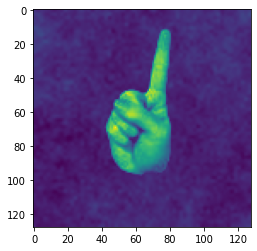

In [16]:
from PIL import Image
img=Image.open(train_files[0])
plt.imshow(img)

In [17]:
np.array(img).shape

(128, 128)

In [18]:
train_files[0][-5]

'R'

In [19]:
X_train=np.zeros((len(train_files),128,128))
Y_train=np.zeros((len(train_files),1))
for i, fi in enumerate(train_files):
    im=Image.open(fi)
    # : -> all elements
    X_train[i,:,:]=np.array(im)
    Y_train[i]=   fi[-6]
    

In [20]:
X_train[0]

array([[60., 58., 53., ..., 61., 63., 65.],
       [61., 60., 56., ..., 62., 65., 67.],
       [63., 63., 64., ..., 64., 69., 72.],
       ...,
       [43., 43., 44., ..., 58., 57., 57.],
       [47., 45., 41., ..., 60., 60., 60.],
       [49., 46., 39., ..., 61., 62., 62.]])

In [21]:
X_train/255.0 #because range of a pixel number is from 1 to 255

array([[[0.23529412, 0.22745098, 0.20784314, ..., 0.23921569,
         0.24705882, 0.25490196],
        [0.23921569, 0.23529412, 0.21960784, ..., 0.24313725,
         0.25490196, 0.2627451 ],
        [0.24705882, 0.24705882, 0.25098039, ..., 0.25098039,
         0.27058824, 0.28235294],
        ...,
        [0.16862745, 0.16862745, 0.17254902, ..., 0.22745098,
         0.22352941, 0.22352941],
        [0.18431373, 0.17647059, 0.16078431, ..., 0.23529412,
         0.23529412, 0.23529412],
        [0.19215686, 0.18039216, 0.15294118, ..., 0.23921569,
         0.24313725, 0.24313725]],

       [[0.23137255, 0.21568627, 0.18823529, ..., 0.23529412,
         0.21568627, 0.20784314],
        [0.21960784, 0.21176471, 0.19215686, ..., 0.22745098,
         0.20784314, 0.19607843],
        [0.20392157, 0.20392157, 0.2       , ..., 0.21176471,
         0.18823529, 0.17647059],
        ...,
        [0.23921569, 0.22745098, 0.20392157, ..., 0.21176471,
         0.22352941, 0.23137255],
        [0.2

In [22]:
# Sequantial -> Layers - Conv, Dense, 
# Relu , Leaky Relu
model= keras.Sequential([
    # 1
    keras.layers.Conv2D(
    filters=120,
    kernel_size=3,
        # filtering out negative values
    activation='relu',
    input_shape=(128,128,1)
    ),
    # 2
    keras.layers.Conv2D(
    filters=24,
    kernel_size=3,
    activation='relu',
    ),
    # 3
    # 1d matrix
    keras.layers.Flatten(),
    # 4
    # reduction layers
    keras.layers.Dense(
        units=96,
        activation='relu',
    ),
    # 5 
    # 96 units -> 6 units
    keras.layers.Dense(6,activation='softmax') # 0-5 fingers
    
])
# 10^6 -> 6 error E(X1)+E(X2) minimize
#Conv2D , Dense , flatten , maxpool //tuesday  ,activation, filter //thrusday next assigment tuesday, saturday 

2022-06-15 22:42:32.004185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 120)     1200      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 24)      25944     
                                                                 
 flatten (Flatten)           (None, 369024)            0         
                                                                 
 dense (Dense)               (None, 96)                35426400  
                                                                 
 dense_1 (Dense)             (None, 6)                 582       
                                                                 
Total params: 35,454,126
Trainable params: 35,454,126
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_train=X_train.reshape(len(X_train),128,128,1)

In [26]:
X_train.shape

(18000, 128, 128, 1)

In [27]:
# Training model
# Data -> 18000
# Train + Test + Validation
# Train data + Test Data
# Validation/Test Data -> (0.1*18000) -> 1800
# Train Data -> 18000-1800
model.fit(X_train, Y_train,epochs=2,validation_split=0.1)

Epoch 1/2
507/507 [==============================] - ETA: 0s - loss: 6.9435 - accuracy: 0.9700

KeyboardInterrupt: 